### Problem 7

In [1]:
import numpy as np ; from scipy.optimize import fsolve, minimize, root
import pyEdgeworthBox as eb ; import matplotlib.pyplot as plt

#### Problem 1

<u> Part (a) </u> <br>
Implement the generalized equilibrium model used in class, but with Cobb-Douglasutility functions rather than quasilinear utility. (As was done in class, program the firstorder conditions for the consumers.) Use $$u(x_1,x_2)= 0.3 \times log(x_1) + 0.7 \times log(x_2) $$ Let consumer a be endowed with 2 units of each good and consumer 3 b be endowed with 1 unit of each good. Figure out the price and the quantities consumed.

In [2]:
I1a = 2 ; I2a = 2 ; I1b = 1 ; I2b = 1 

def constraints(arglist,endow1a,endow1b,endow2a,endow2b):
    x1a = arglist[0] ; x1b = arglist[1] ; p = arglist[2] ; cons = np.zeros(3)

    # Returns quantity consumed at period 2
    x2a = endow2a + p*(endow1a-x1a)
    x2b = endow2b + p*(endow1b-x1b)

    #Returns Equilibirum First Order Condition (u1a(x)-p*u2a(x) = 0)
    cons[0] = (0.3/x1a) -p *0.7/x2a # f.o.c. for consumer a
    cons[1] = (0.3/x1b) -p *0.7/x2b # f.o.c. for consumer b

    #Returns Market clearance condition (Ie Warlas'condition)
    cons[2] = x1a+x1b-endow1a-endow1b
    return cons

endow1a=2 ; endow1b=1 ; endow2a=2 ; endow2b=1 
res= root(constraints,np.ones(3),args=(endow1a,endow1b,endow2a,endow2b))
#print(res)
x=res['x']
print(f"x1a is given by {x[0]:.3f}")
print(f"x1b is given by {x[1]:.3f}")
print(f"the price is  {x[2]:.3f}")
print(f"x2a is given by {endow2a + x[2]*(endow1a-x[0]):.3f}")
print(f"x2b is given by {endow2b + x[2]*(endow1b-x[1]):.3f}")

print(f"So consumer a buys {x[0]-endow1a:.3f} units of good 1 at price {x[2]:.3f} and buys {x[2]*(endow1a-x[0]):.3f} units of good 2 at price 1.")


x1a is given by 2.000
x1b is given by 1.000
the price is  0.429
x2a is given by 2.000
x2b is given by 1.000
So consumer a buys 0.000 units of good 1 at price 0.429 and buys -0.000 units of good 2 at price 1.


Validate Walras’ law: That is, show that the market for good number 2 also clears inequilibrium, even though this market clearing condition (demand=supply) is not partof the equation system used in the solution .

In [3]:
# Proof walra's law
print(endow2a + x[2]*(endow1a-x[0]) + endow2b + x[2]*(endow1b-x[1]) -endow2a -endow2b)



0.0


Draw a random point in the Edgeworth box for this problem, that is, an allocation ofthe goods to the two consumers. Show that the indifference curves of the consumerscross in this point. (The slopes of the indifference curves are (- du/dx1) / (du/dx2) ).By drawing 1000 random points from the Edgeworth box, find some points in theEdgeworth box that give Pareto improvements to the initial random point.

(0.0, 5.0)

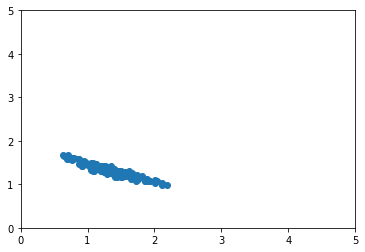

In [4]:
# Prof correction
randompoint = np.random.uniform(size = 2)*5 
x1a=randompoint[0]
x1b=5-randompoint[0]
x2a=randompoint[1]
x2b=5-randompoint[1]
slopea = -(3/7)*(x1a/x2a)
slopeb = -(3/7)*(x1b/x2b)

util = lambda x1,x2: 0.3*np.log(x1) + 0.7*np.log(x2)

utila = util(x1a,x2a) ; utilb = util(x1b,x2b)
randompoints=np.random.uniform(size=20000)*5
randompoints.shape=(10000,2)

utila_all = util(randompoints[:,0],randompoints[:,1])
utilb_all = util(5-randompoints[:,0],5-randompoints[:,1])

pareto_improvement= (utila_all>utila) & (utilb_all>utilb) 
plt.scatter(randompoints[pareto_improvement,0],randompoints[pareto_improvement,1])
plt.ylim(0, 5)
plt.xlim(0,5)


In [5]:
utila = util(2,2)
utilb = util(3,3)
randompoints=np.random.uniform(size=20000)*5
randompoints.shape=(10000,2)

utila_all = util(randompoints[:,0],randompoints[:,1])
utilb_all = util(5-randompoints[:,0],5-randompoints[:,1])

pareto_improvement= (utila_all>utila) & (utilb_all>utilb)    
print(np.sum(pareto_improvement))

0


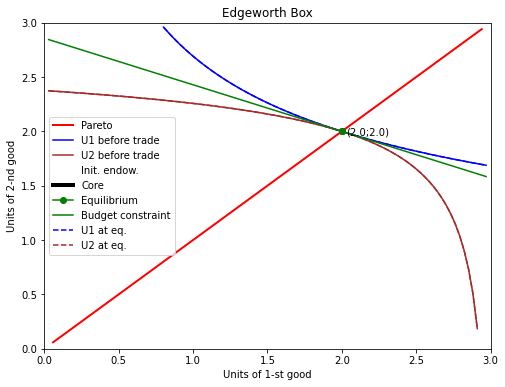

In [6]:
EB=eb.EdgeBox(  u1 = lambda x,y: 0.3 * np.log(x) + 0.7*np.log(y)
              , u2 = lambda x,y: 0.3 * np.log(x) + 0.7*np.log(y)
              , IE1 = [2,2]
              , IE2 = [1,1])

plt.figure(figsize = (8, 6))
EB.plot()

The pareto optmimum is found where the two indifference curves are tangent and where this tangent is also meeting the budget line. It means that at this precise point the utility for both consumers is maximized and is feasible.

[Source Package](https://github.com/maxlit/pyEdgeworthBox/blob/master/README.ipynb)

### Exercice 2 (using the professor's correction)

In the simplest version of a general equilibrium model with production, we have oneconsumer, who chooses consumption and leisure (and labor supply) and a firm that buys labor and sells consumption products. \\ Choose labor as the numeraire. We will let the firm be competetive and we let it have a simple production function $$f(m) = 10 \times m$$ , where m is labor. The firms profit is then $$p \times f(m) - m$$. And the first order condition for profit maximization is p * 10 - 1 = 0. Let leisure be given by 1-m, and let theconsumer preferences be represented with $$u(c,m)= c + (1/(1+1/0.2))m^{(1+1/0.2)} $$. The consumer budget is that wm = pc, but since w = 1, this is just m = pc. Implement this model. Figure out the equilibrium price, quantity produced and the equilibrium laborsupply.

First Order Conditions for equilibrium states that the optimal quantity consumed at period 1 is given by a partial derivative of the utility function with respect to each consumer. <br>
Then the FOC states that the optimal price is found for consumption 1 a + consumption 1b - Endowment 1a - Endowment 1b equal to 0.

In [16]:
# Firm FOC from p*10 - 1 = 0
price = 0.1
# From consumer f.o.c found from the derivative of the utility function with respect to m. 
m = (1/price)**0.2
# From consumer budget
c = m/price
# firm production
cfirm=10*m

print(f'Optimal price : {price}') ; print(f'Quantity of Work : {m}') 
print(f'Quantity of consumption : {c}') ; print(f"Quantity of Firm's production : {cfirm}")

Optimal price : 0.1
Quantity of Work : 1.5848931924611136
Quantity of consumption : 15.848931924611135
Quantity of Firm's production : 15.848931924611136


(<u>Part b</u>) <br>
The model in problem (a) is a bit uninteresting because of the (constant-returns-to-scale) production technology function that determines the price. It is fairly easy to see that $p=0.1$ directly from the profit maximization of the firm, and the rest ofthe solution really just follows from that. We want a richer model, let $$f(m) = m^{0.7}$$ (We can easily think that there is some capital in the background here, right). Now the “problem” is that the firm will have a profit. This profit is going to “break” themodel. So let the firm give the profit to the consumer. Try to implement this model.

In [18]:
def general_equilibirum2(arglist):
    m = arglist[0] ; p = arglist[1] ; out = np.zeros(2)
    out[0] = 1/p - m**(1/0.2) # f.o.c. for consumer from budget constraint
    out[1] = p*0.7*m**(-0.3) -1 # f.o.c. for firm from the derivative of the utility function
    return out

res=root(general_equilibirum2,np.ones(2)) #Initial guess is 1
#print(res)
x=res['x']
print(f"So the labor supply is {x[0]:.3f}")
print(f"The price is {x[1]:.3f}")
print(f"And the production is {x[0]**0.7:.3f}") #New production function
profit = x[1]*x[0]**0.7-x[0]
print(f"The profit is given by {profit:.3f}")
print(f"And hence the consumption is {(profit+x[0])/x[1]:.3f}, which identical to the production")
print("The Walras' law holds (we cleared the labor market in the model)")

So the labor supply is 0.935
The price is 1.400
And the production is 0.954
The profit is given by 0.401
And hence the consumption is 0.954, which identical to the production
The Walras' law holds (we cleared the labor market in the model)


(<u>Part C</u>) <br>
Enter a government into the model. The government is going to need some taxes -since everything is in real terms in such a model, the government needs one unit of c. To finance that unit of c, let the government tax consumption. So government imposes a tax rate t. Then the price for the consumer will be p(1+t), while the price for the producer will be p. And t will need to be set so that tc=p (the right hand side
being the cost for the government when it needs to buy one unit of c). Try to implement this model and figure out the utility of the consumer in the model with government compared to the model without government. (Since the government does not do anything useful in this model, the consumer should be worse off.)

In [20]:
def general_equilibrium3(arglist):
    m = arglist[0] ; p = arglist[1] ; t = arglist[2] # Tax Rate
    out = np.zeros(3)
    out[0] = 1/(p+t) - m**(1/0.2) # f.o.c. for consumer from utility function
    out[1] = p*0.7*m**(-0.3) -1 # f.o.c. for firm from produciton function
    profit = x[1]*x[0]**0.7-x[0]
    c = (profit + m)/(p+t)
    out[2] = t*c-p # Constraint to set t so that t*c = p
    return out

res= root(general_equilibrium3,np.ones(3))
#print(res)
x=res['x']
print(f"So the labor supply is {x[0]:.3f}")
print(f"The price is {x[1]:.3f}")
print(f"And the production is {x[0]**0.7:.3f}")
profit = x[1]*x[0]**0.7-x[0]
print(f"The profit is given by {profit:.3f}")
print(f"And hence the consumption is {(profit+x[0])/(x[1]+x[2]):.3f}")
print("However the labour supply and the consumption does not match and the Warla's law is not respected")

So the labor supply is 0.637
The price is 0.950
And the production is 0.730
The profit is given by 0.056
And hence the consumption is 0.001
However the labour supply and the consumption does not match and the Warla's law is not respected


<ipython-input-20-f0d53588bdfd>:5: RuntimeWarning: invalid value encountered in double_scalars
  out[1] = p*0.7*m**(-0.3) -1 # f.o.c. for firm from produciton function


So the numbers don't add up here, because the goverment needs more than the full production. Let us reduce the government need to 0.1 units.

In [21]:
def general_equilibrium3b(arglist):
    m = arglist[0] ; p = arglist[1] ; t = arglist[2]
    out = np.zeros(3)
    out[0] = 1/(p+t) - m**(1/0.2) # f.o.c. for consumer
    out[1] = p*0.7*m**(-0.3) -1 # f.o.c. for firm
    profit = p*m**0.7-m
    c = (profit + m)/(p+t)
    out[2] = t*c-p/10
    return out

res= root(general_equilibrium3b,np.ones(3))
#print(res)
x=res['x']
print(f"So the labor supply is {x[0]:.3f}")
print(f"The price is {x[1]:.3f}")
print(f"The tax is {x[2]:.3f}")
print(f"And the production is {x[0]**0.7:.3f}")
profit = x[1]*x[0]**0.7-x[0]
print(f"The profit is given by {profit:.3f}")
print(f"And hence the consumption is {(profit+x[0])/(x[1]+x[2]):.3f}")

So the labor supply is 0.915
The price is 1.391
The tax is 0.166
And the production is 0.940
The profit is given by 0.392
And hence the consumption is 0.840


So, there is some distortion in this model. The labor supply is reduced from 0.935 to 0.915 because of taxation.

In [22]:
def utility(c,m):
    return c - 1/(1+1/0.2)*m**(1+1/0.2)
print(utility(0.954,0.935))
print(utility(0.840,0.915))

0.8426427711583098
0.7421917892990391


So we see that the utility of the consumer (which is the same as the cv or the ev or the consumer surplus, right!) is falling by a tiny bit more than the government need. This is the deadweight loss of taxation.

(<u>Part d</u>) <br> Improve on the model from problem c) by letting the government size be G (instead of 1 as in the model). Let the government be useful to the consumer by adding a termG to the utility function. Try to figure out the utility reduction for the consumer as a function of the government size and make a plot of this.

So we make the equation system a function of government size.

    fjac: array([[-0.75988065, -0.08362665, -0.64466114],
       [ 0.394948  , -0.84706962, -0.35565312],
       [ 0.51633079,  0.52486154, -0.67669999]])
     fun: array([-4.90190111e-11, -1.00031095e-12,  1.32025751e-10])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-2.28479079e-08, -2.84181359e-08, -5.05983400e-08])
       r: array([ 3.60656448,  0.09316352, -0.13610338, -0.84595962, -0.38572647,
       -0.64269814])
  status: 1
 success: True
       x: array([0.91528349, 1.39113299, 0.16562768])


[]

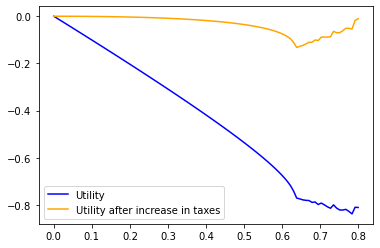

In [27]:
def general_equilibrium4(dep,G):
    m = dep[0] ; p = dep[1] ; t = dep[2] ; out = np.zeros(3)
    out[0] = 1/(p+t) - m**(1/0.2) # f.o.c. for consumer
    out[1] = p*0.7*m**(-0.3) -1 # f.o.c. for firm
    profit = p*m**0.7-m
    c = (profit + m)/(p+t)
    ## The only change is in the equation below    
    out[2] = t*c-p*G
    return out

res= root(general_equilibrium4,np.ones(3),args=0.1)
print(res)

govsizes=np.linspace(0,0.8,100)
utilityloss = np.zeros(100)
for i in range(100):
    res= root(general_equilibrium4,np.ones(3),args=govsizes[i])
    x=res['x']
    profit = x[1]*x[0]**0.7-x[0]
    c = (profit+x[0])/(x[1]+x[2])
    if i==0:
        utilityloss[i]=0
        baseutility=utility(c,x[0])
    else:
        utilityloss[i] = utility(c,x[0])-baseutility

plt.plot(govsizes,utilityloss, color = 'Blue', label = "Utility")
plt.plot(govsizes,utilityloss+govsizes, color = 'Orange', label = "Utility after increase in taxes")
plt.legend() ; plt.plot()

So the orange line is the deadweight loss of taxation. It is very small for small taxes. It is also small in this model because the labor supply is quite inelastic.

(<u>Part e</u>) <br> 
(Pollution and Pigou taxes.) Let the firm produce pollution r in addition toconsumption goods. Let r be equal to c. In the utility function, add a term -0.5 r, but assume that consumers do not take into account this term when choosing consumption. (This does not make sense for consumers, but: Imagine that therewere 1000 identical consumers. The model would then be almost exactly the same,except that pollution would almost completely be determined by the consumption of the others. So in this context, it makes sense that the consumer disregards thepollution when deciding upon consumption.) All in all, this means that the consumer decision problem is exactly as before, but that when we use the utility function to measure welfare, consumers will be worse off because of pollution. Redo point d. with this model.

So this is very easy, since the pollution does not affect behavior, we can just use the same as before, we just need to adjust the utility function in the welfare assessment. We specify this so that it is production that pollutes. So pollution is given by (c+govsize)

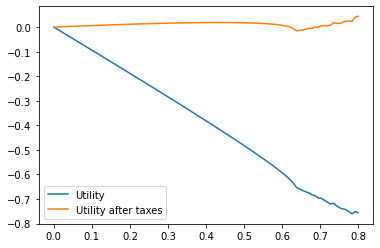

In [31]:
govsizes=np.linspace(0,0.8,100)
utilityloss = np.zeros(100)
for i in range(100):
    res=root(general_equilibrium4,np.ones(3),args=govsizes[i])
    x=res['x']
    profit = x[1]*x[0]**0.7-x[0]
    c = (profit+x[0])/(x[1]+x[2])
    if i==0:
        utilityloss[i]=0
        baseutility=utility(c,x[0]) - 0.5 * (c+govsizes[i])
    else:
        utilityloss[i] = utility(c,x[0])- 0.5 * (c+govsizes[i]) -baseutility

plt.plot(govsizes,utilityloss, label = "Utility")
plt.plot(govsizes,utilityloss+govsizes, label = "Utility after taxes")
plt.legend() ; plt.show()

So we see that the deadweight loss of taxation is smallest for a tax of around 0.5.

The reason for this is that production and consumption is inititally too high. Consumers would be better off by enjoying a life with less consumption and more leisure. In this case, the tax pushes them in the right direction.